# Spam Mail Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset

In [3]:
mail_df=pd.read_csv('mail_data.csv')

In [4]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail_df.shape

(5572, 2)

In [6]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# statistical measures

In [8]:
mail_df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# Data Cleaning

In [9]:
# number of missing values in each column

In [10]:
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
mail_df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

# Exploratory Data Analysis

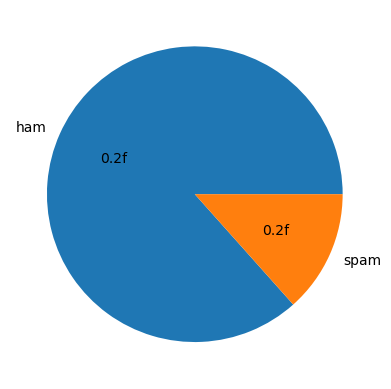

In [12]:
plt.pie(mail_df['Category'].value_counts(),labels=['ham','spam'],autopct='0.2f')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(mail_df['Category'])
mail_df['Category']=encoder.transform(mail_df['Category'])

In [14]:
# In text how many alphabets,how many words and how many sentences are using

In [15]:
# 1. number of alphabets

In [16]:
mail_df['num_char']=mail_df['Message'].apply(len)
mail_df['num_char']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: num_char, Length: 5572, dtype: int64

In [17]:
# 2. number of words 

In [18]:
import nltk
mail_df['num_words']=mail_df['Message'].apply(lambda X:len(nltk.word_tokenize(X)))
mail_df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5572, dtype: int64

In [19]:
# 3. number of sentences

In [20]:
mail_df['num_sent']=mail_df['Message'].apply(lambda X:len(nltk.sent_tokenize(X)))
mail_df['num_sent']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sent, Length: 5572, dtype: int64

In [21]:
# Analys Ham_mail and Spam_mail separately

In [22]:
# Ham_mail

In [23]:
mail_df[mail_df['Category']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.421347,1.814922
std,58.434864,14.118974,1.331289
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# Spam_mail

In [25]:
mail_df[mail_df['Category']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.025435
std,29.980287,7.036282,1.543175
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [26]:
# Plot histogram (ham mail VS spam mail)

In [27]:
# num_char

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


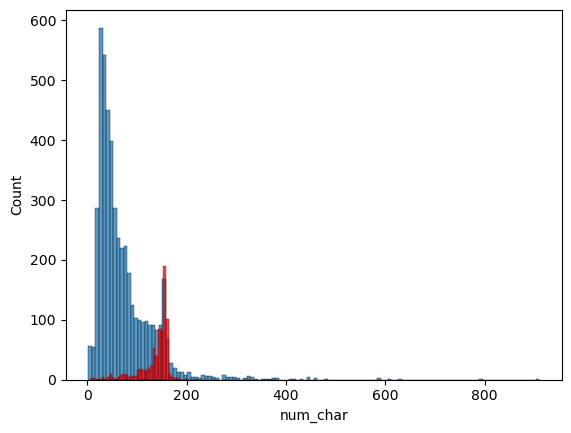

In [28]:
sns.histplot(mail_df[mail_df['Category']==0]['num_char'])
sns.histplot(mail_df[mail_df['Category']==1]['num_char'],color='r')
plt.show()

In [29]:
# num_words

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


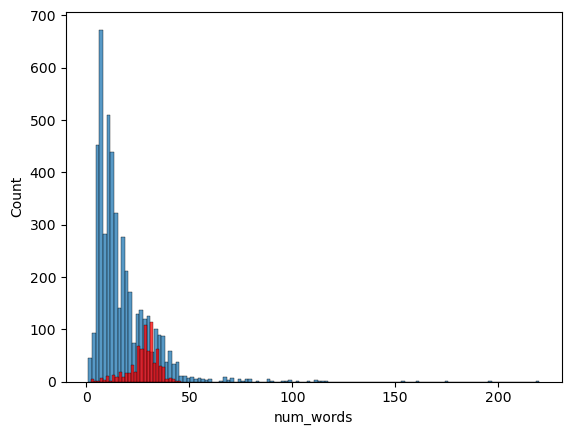

In [30]:
sns.histplot(mail_df[mail_df['Category']==0]['num_words'])
sns.histplot(mail_df[mail_df['Category']==1]['num_words'],color='r')
plt.show()

In [31]:
# num_sent

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


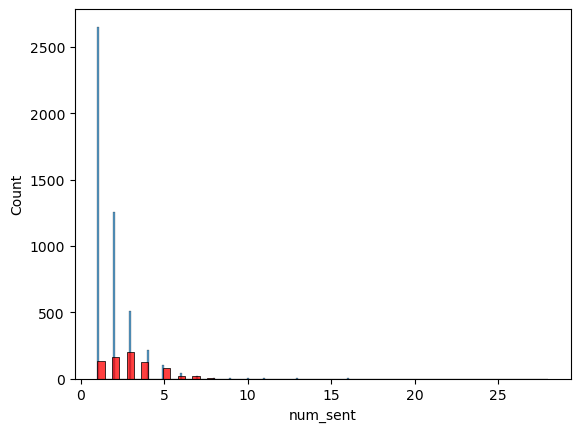

In [32]:
sns.histplot(mail_df[mail_df['Category']==0]['num_sent'])
sns.histplot(mail_df[mail_df['Category']==1]['num_sent'],color='r')
plt.show()

In [33]:
# Relationship between num_char,num_words,num_sent

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

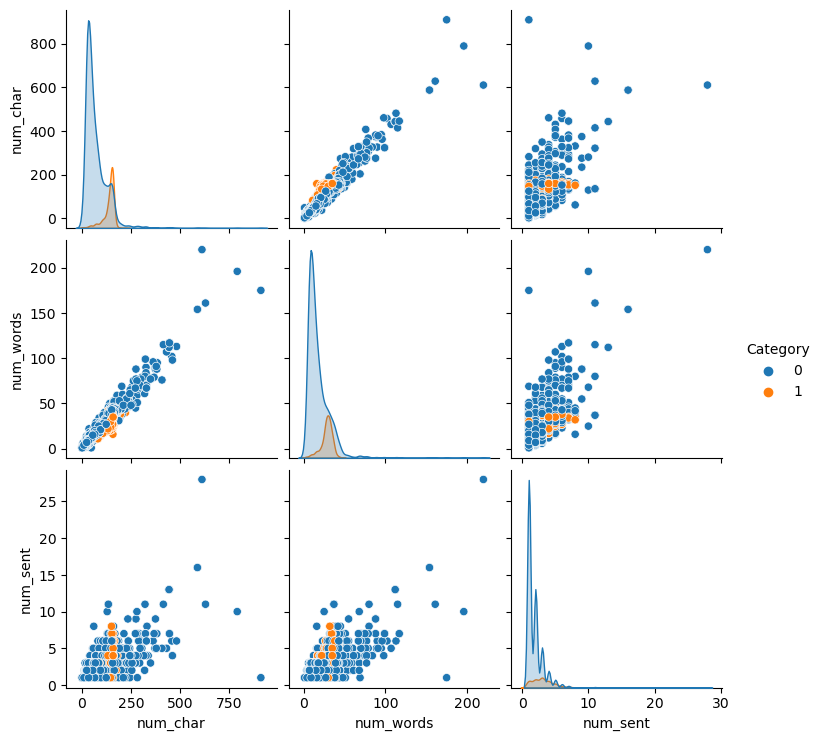

In [34]:
sns.pairplot(mail_df,hue='Category')
plt.show()

# Data Preprocessing

In [35]:
# Punctuation

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Stopwords

In [38]:
import nltk

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
# Stemming

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Loving')

'love'

In [42]:
def transform_text(text):
    text=text.lower()                              #Lowercase()
    text=nltk.word_tokenize(text)                  #Tokenize
    
    l=[]
    for i in text:                                 #Remove special characters
        if i.isalnum():
            l.append(i)
            
    text=l[:]
    l.clear()
    for i in text:                                 #Remove stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
            
    text=l[:]
    l.clear()
    for i in text:                                 #Stemming
        l.append(ps.stem(i))
        
        
    return " " .join(l) 

In [43]:
mail_df['transformed_message']=mail_df['Message'].apply(transform_text)

In [44]:
mail_df.head()

,Category,Message,num_char,num_words,num_sent,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Create words cloud

In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
# Ham mails

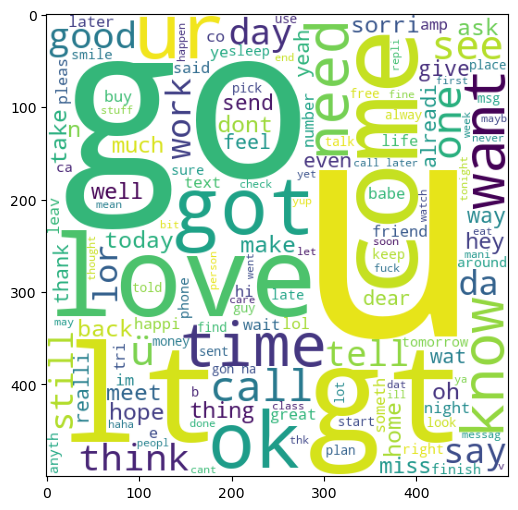

In [47]:
ham_wc=wc.generate(mail_df[mail_df['Category']==0]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
# Spam mails

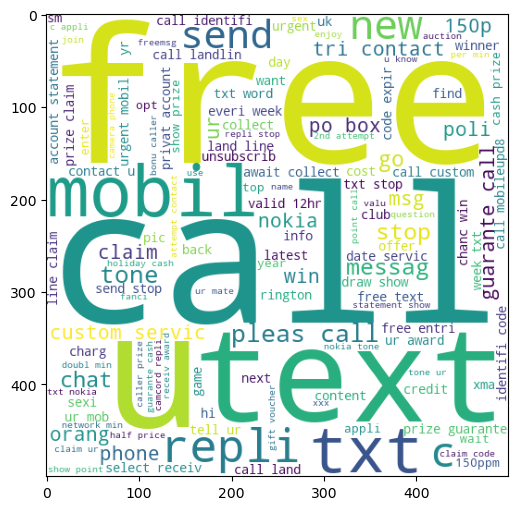

In [49]:
spam_wc=wc.generate(mail_df[mail_df['Category']==1]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
spam_corpus = []
for msg in mail_df[mail_df['Category'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

11506

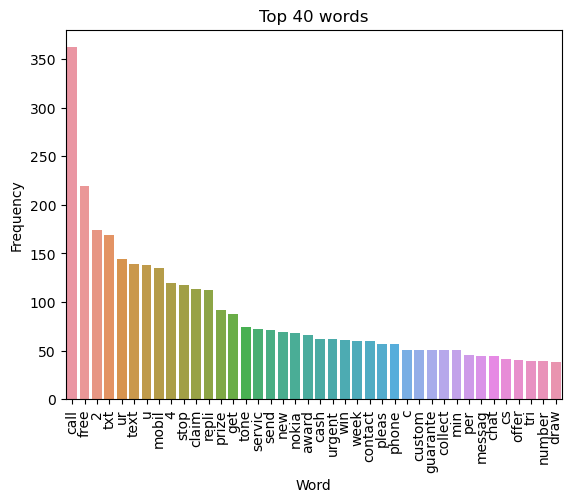

In [52]:
from collections import Counter

top_40_words = pd.DataFrame(Counter(spam_corpus).most_common(40))

# Rename columns for clarity
top_40_words.columns = ['Word', 'Frequency']

# Plot the barplot
sns.barplot(x='Word', y='Frequency', data=top_40_words)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

plt.title('Top 40 words')
# Show the plot
plt.show()

In [53]:
ham_corpus = []
for msg in mail_df[mail_df['Category'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

38803

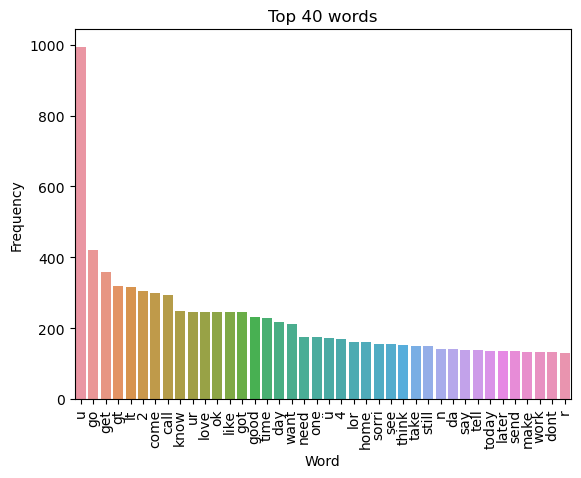

In [55]:
from collections import Counter

top_40_words = pd.DataFrame(Counter(ham_corpus).most_common(40))

# Rename columns for clarity
top_40_words.columns = ['Word', 'Frequency']

# Plot the barplot
sns.barplot(x='Word', y='Frequency', data=top_40_words)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

plt.title('Top 40 words')
# Show the plot
plt.show()

# Model Selection

In [56]:
# Separating data and lebel

In [57]:
X=mail_df['transformed_message'].values
y=mail_df['Category'].values

In [58]:
# Splitting the dataset to training and testing data

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the training data
X_train_trans = tfidf.fit_transform(X_train).toarray()

# Transform the test data (without fitting again)
X_test_trans = tfidf.transform(X_test).toarray()


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
for clf_name, mod in clfs.items():
    mod.fit(X_train_trans, y_train)  # Fit the model
    y_pred = mod.predict(X_test_trans)  # Predict using the model
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision=precision_score(y_test,y_pred)
    print(f"{clf_name}: Accuracy={accuracy:.2f},Precision={precision:.2f}")

SVC: Accuracy=0.97,Precision=0.98
KN: Accuracy=0.91,Precision=1.00
NB: Accuracy=0.97,Precision=1.00
DT: Accuracy=0.93,Precision=0.82
LR: Accuracy=0.96,Precision=0.95
RF: Accuracy=0.97,Precision=1.00


C:\Users\nirma\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Accuracy=0.96,Precision=0.92
BgC: Accuracy=0.96,Precision=0.89
ETC: Accuracy=0.97,Precision=0.99
GBDT: Accuracy=0.95,Precision=0.96
xgb: Accuracy=0.97,Precision=0.94


In [65]:
clf=XGBClassifier()
clf.fit(X_train_trans,y_train)
y_pred=clf.predict(X_test_trans)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f"Accuracy={accuracy:.2f},Precision={precision:.2f}")

Accuracy=0.97,Precision=0.97


# Prediction System

In [66]:
input_sample = X_test_trans[6]
input_sample = np.asarray(input_sample)
input_sample = input_sample.reshape(1, -1)
prediction = clf.predict(input_sample)

# Interpret the prediction result
if prediction[0] == 1:
    print("Spam mail")
else:
    print("Ham mail")

Ham mail


In [67]:
y_test[6]

0

In [68]:
X_test[3]

'time tell friend around'

In [69]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))